# Equipo #9 



## Preparacion y Normalizacion de los datos

Carga los datos:
- Selecciona solo las clases Setosa y Versicolor.
- Elige solo el largo y ancho del sépalo.
- Aplica la normalización por estandarización.

In [ ]:
# =============================================================================
# Importar librerías necesarias
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.patches as mpatches
from sklearn.model_selection import StratifiedShuffleSplit

# =============================================================================
# Cargar y Filtrar el Dataset (Setosa y Versicolor)
# =============================================================================
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['target_name'] = iris.target_names[iris.target]

# Seleccionar solo las primeras 100 muestras (Clases 0 y 1)
df_binario = df[df['target'] != 2].copy()

# Seleccionar las dos primeras características (largo y ancho del sépalo)
X = df_binario.iloc[:, :2].values
y = df_binario['target'].values

# =============================================================================
# Normalización de las Características (Estandarización Z-score)
# =============================================================================
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)

print("Datos listos. Dimensiones de X:", X_normalizado.shape)
print("Dimensiones de y:", y.shape)

# El algoritmo de Perceptrón usará X_normalizado y y

In [15]:

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


dataset_perceptron = df[['sepal length (cm)', 'sepal width (cm)']]


print(dataset_perceptron) # Muestra todo el dataset (150 filas)

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]


# Muestra de las primeras filas
El comando df_iris.head() es una función de la librería **pandas**. Su propósito es simple y directo: te permite ver las primeras 5 filas del DataFrame (df_iris) por defecto.

In [ ]:
# Mostrar primeras filas
df_iris.head()


El comando df_iris.info()'Este comando te proporciona una "ficha técnica" del DataFrame. Es lo primero que se debe revisar al cargar un nuevo conjunto de datos. Este comando df_iris.describe() te da un resumen estadístico de las variables numéricas. Es un paso fundamental para entender la distribución de tus datos.



In [ ]:
# Info general del dataset
df_iris.info()
# Estadísticas descriptivas
df_iris.describe()

    Algoritmo del Perceptrón (Pseudocódigo)
El algoritmo describe el proceso de entrenamiento del perceptrón:


Inicialización: Los pesos (w) y el sesgo (b) se inicializan en cero.


Bucle de Épocas: Se itera por el número de épocas (n_iter).

Bucle de Ejemplos: Para cada ejemplo de entrenamiento (xi,yi):

Se calcula la 

salida como f(w⋅xi+b).

La 

función escalón (f) es: f(z)=1 si z≥0, de lo contrario 0.

Se calcula el 

error como error=yi−salida.

Se actualizan los 

pesos y el sesgo:

w=w+lr⋅error⋅xi

b=b+lr⋅error

Se cuenta el número de errores en la época.



Nota: lr es la Tasa de aprendizaje.

# Implementación de la Clase Perceptrón
Esta es la implementación del algoritmo del Perceptrón siguiendo el pseudocódigo. Contiene la lógica para la inicialización, el cálculo del error y la actualización de pesos por cada época.



# Experimentacion 1

## Para eta = 0.01


## Tasa de aprendizaje 0.01 y epoca 10

In [23]:
class Perceptron(object):
    """Clasificador Perceptrón.

    Parámetros
    ------------
    eta : float
        Tasa de aprendizaje (entre 0.0 y 1.0).
    n_iter : int
        Número de pasadas sobre el conjunto de entrenamiento (épocas).
    random_state : int
        Semilla para la generación de números aleatorios para la
        inicialización de pesos.
    """
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Entrenar el clasificador Perceptrón.

        Parámetros
        -----------
        X : array, forma = [n_ejemplos, n_características]
            Vectores de entrenamiento.
        y : array, forma = [n_ejemplos]
            Valores objetivo/etiquetas.

        Devuelve
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        # Inicializar pesos y sesgo (bias) en cero
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = [] # Lista para guardar errores por época

        # PARA cada época hasta n_iter:
        for i in range(self.n_iter):
            errors = 0
            # PARA cada ejemplo (xi, yi):
            for xi, target in zip(X, y):
                # 1. calcular salida (net_input)
                # w_ . xi + b (El primer peso self.w_[0] es el sesgo)
                net_input = np.dot(xi, self.w_[1:]) + self.w_[0]
                
                # 2. calcular salida = f(w . xi + b) (función escalón)
                # f(z) = 1 si z >= 0, de lo contrario 0
                output = np.where(net_input >= 0.0, 1, 0)
                
                # 3. calcular error = yi - salida
                error = target - output
                
                # 4. actualizar pesos y sesgo
                # w = w + lr * error * xi
                self.w_[1:] += self.eta * error * xi
                # b = b + lr * error
                self.w_[0] += self.eta * error
                
                # si error != 0: errores += 1
                if error != 0.0:
                    errors += 1
            
            # guardar errores de la época
            self.errors_.append(errors)
            
            # Opcional: Condición de parada si no hay errores
            if errors == 0:
                print(f"Convergencia alcanzada en la época {i + 1}.")
                break
                
        return self

    def predict(self, X):
        """Devuelve la etiqueta de clase después de la función escalón."""
        net_input = np.dot(X, self.w_[1:]) + self.w_[0]
        # Devuelve 1 o 0 (función escalón)
        return np.where(net_input >= 0.0, 1, 0)

# Gráfica de Errores por Época (Experimentación)
Esta celda entrena el Perceptrón con los datos normalizados y grafica el error total cometido en cada pasada (época).

### Tasa de aprendizaje 0.01 y 10 epocas

In [40]:
# Entrenar el Perceptrón
ppn = Perceptron(eta=0.01, n_iter=10) # Usando tasa de aprendizaje 0.01 y 10 épocas
ppn.fit(X_normalizado, y)

# Gráfica a) Errores por época
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de errores')
plt.title('Impacto del Número de Errores por Época (eta=0.1)')
plt.grid(True)
plt.show()

# Resultado de la precisión (opcional para el análisis)
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_normalizado)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_score(y, y_pred):.2f}")

Convergencia alcanzada en la época 4.


Precisión del modelo en el conjunto de entrenamiento: 1.00


## Gráfica de Regiones de Decisión (Frontera)
Esta celda te muestra cómo se ve la frontera de decisión que el Perceptrón ha aprendido, separando las regiones de la clase 0 (Setosa) y 1 (Versicolor).

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar generador de marcadores y mapa de color
    markers = ('o', 's', 'x', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Trazar ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Clase {cl}', 
                    edgecolor='black')

# Gráfica b) Regiones de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X_normalizado, y, classifier=ppn)
plt.title('Regiones de Decisión del Perceptrón (Separación Setosa/Versicolor)')
plt.xlabel('Largo del Sépalo [Normalizado]')
plt.ylabel('Ancho del Sépalo [Normalizado]')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Experimentacion

## Tasa de aprendizaje 0.01 y 25 épocas

In [41]:
# Entrenar el Perceptrón
ppn = Perceptron(eta=0.01, n_iter=25) # Usando tasa de aprendizaje 0.01 y 25 épocas
ppn.fit(X_normalizado, y)

# Gráfica a) Errores por época
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de errores')
plt.title('Impacto del Número de Errores por Época (eta=0.1)')
plt.grid(True)
plt.show()

# Resultado de la precisión (opcional para el análisis)
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_normalizado)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_score(y, y_pred):.2f}")

Convergencia alcanzada en la época 4.


Precisión del modelo en el conjunto de entrenamiento: 1.00


In [42]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar generador de marcadores y mapa de color
    markers = ('o', 's', 'x', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Trazar ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Clase {cl}', 
                    edgecolor='black')

# Gráfica b) Regiones de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X_normalizado, y, classifier=ppn)
plt.title('Regiones de Decisión del Perceptrón (Separación Setosa/Versicolor)')
plt.xlabel('Largo del Sépalo [Normalizado]')
plt.ylabel('Ancho del Sépalo [Normalizado]')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Tasa de aprendizaje 0.01 y 50 epocas

Convergencia alcanzada en la época 4.


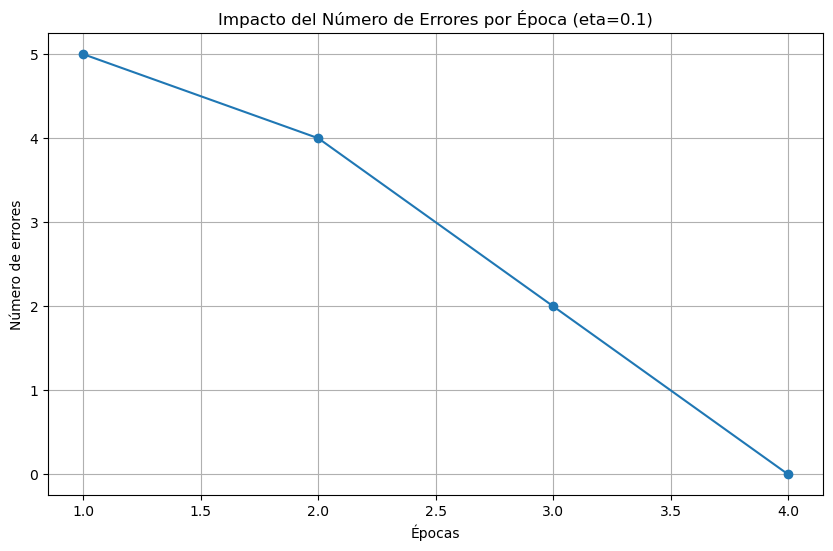

Precisión del modelo en el conjunto de entrenamiento: 1.00


In [50]:
# Entrenar el Perceptrón
ppn = Perceptron(eta=0.01, n_iter=50) # Usando tasa de aprendizaje 0.01 y 50 épocas
ppn.fit(X_normalizado, y)

# Gráfica a) Errores por época
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de errores')
plt.title('Impacto del Número de Errores por Época (eta=0.1)')
plt.grid(True)
plt.show()

# Resultado de la precisión (opcional para el análisis)
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_normalizado)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_score(y, y_pred):.2f}")

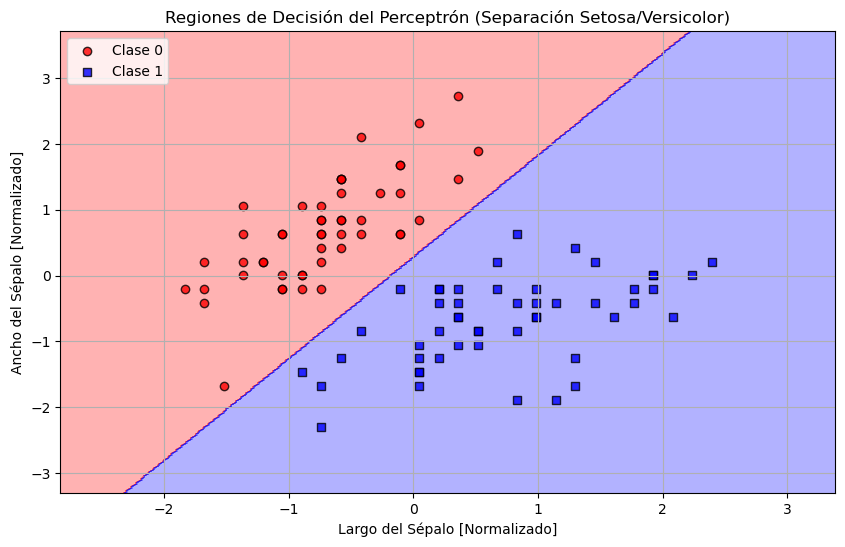

In [49]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar generador de marcadores y mapa de color
    markers = ('o', 's', 'x', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Trazar ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Clase {cl}', 
                    edgecolor='black')

# Gráfica b) Regiones de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X_normalizado, y, classifier=ppn)
plt.title('Regiones de Decisión del Perceptrón (Separación Setosa/Versicolor)')
plt.xlabel('Largo del Sépalo [Normalizado]')
plt.ylabel('Ancho del Sépalo [Normalizado]')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Tasa de aprendizaje 0.01 y 100 epocas

Convergencia alcanzada en la época 4.


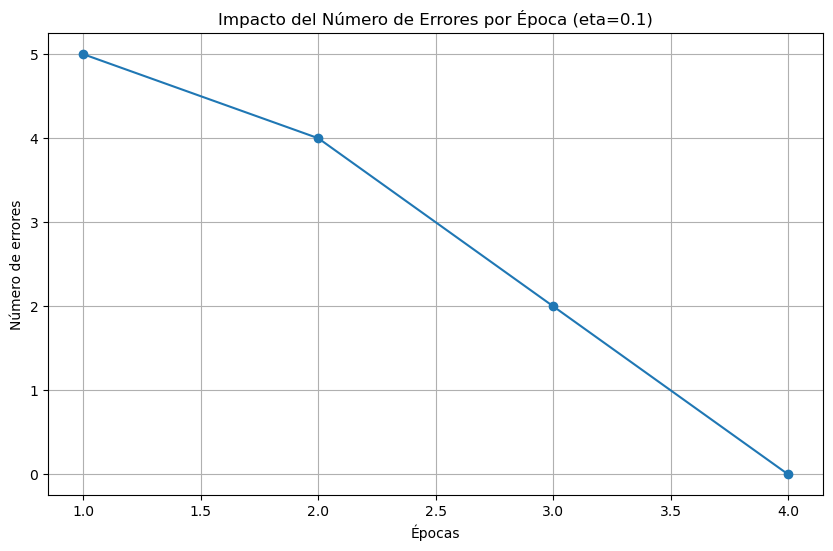

Precisión del modelo en el conjunto de entrenamiento: 1.00


In [47]:
# Entrenar el Perceptrón
ppn = Perceptron(eta=0.01, n_iter=100) # Usando tasa de aprendizaje 0.1 y 100 épocas
ppn.fit(X_normalizado, y)

# Gráfica a) Errores por época
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de errores')
plt.title('Impacto del Número de Errores por Época (eta=0.1)')
plt.grid(True)
plt.show()

# Resultado de la precisión (opcional para el análisis)
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_normalizado)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_score(y, y_pred):.2f}")

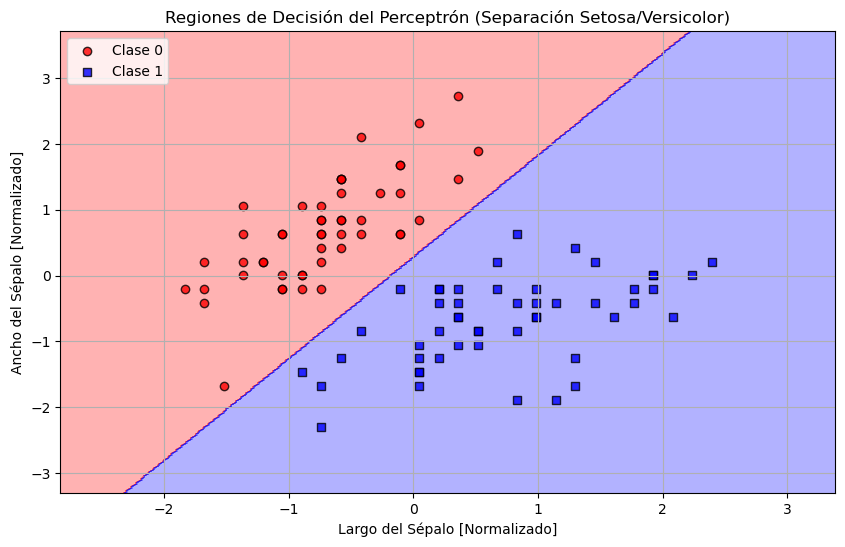

In [51]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar generador de marcadores y mapa de color
    markers = ('o', 's', 'x', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Trazar ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Clase {cl}', 
                    edgecolor='black')

# Gráfica b) Regiones de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X_normalizado, y, classifier=ppn)
plt.title('Regiones de Decisión del Perceptrón (Separación Setosa/Versicolor)')
plt.xlabel('Largo del Sépalo [Normalizado]')
plt.ylabel('Ancho del Sépalo [Normalizado]')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Analisis

## Tasa de Aprendizaje Baja (η=0.01)
### Interpretación Teórica (Lo que significa):
- Se detiene en Época 4.	
### Estabilidad y Precisión. 
- Al ser la tasa más baja, el modelo toma los pasos más pequeños y cautelosos para ajustar sus pesos.
### La frontera no cambia.
- Frontera Óptima y Estable. Una η baja asegura que el Perceptrón no se "pase" de la solución. El modelo encuentra el límite más estable de forma muy precisa, y una vez que lo encuentra, se mantiene allí.

# Experimentacion 2

## Para eta = 0.1

## Tasa de aprendizaje 0.1 y 10 epocas

In [32]:
# Entrenar el Perceptrón
ppn = Perceptron(eta=0.1, n_iter=10) # Usando tasa de aprendizaje 0.1 y 10 épocas
ppn.fit(X_normalizado, y)

# Gráfica a) Errores por época
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de errores')
plt.title('Impacto del Número de Errores por Época (eta=0.1)')
plt.grid(True)
plt.show()

# Resultado de la precisión (opcional para el análisis)
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_normalizado)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_score(y, y_pred):.2f}")

Convergencia alcanzada en la época 6.


Precisión del modelo en el conjunto de entrenamiento: 1.00


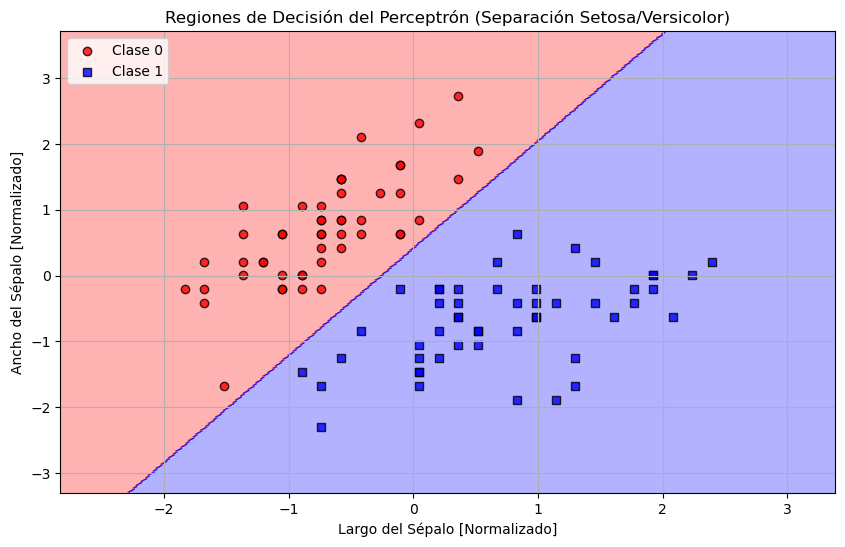

In [33]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar generador de marcadores y mapa de color
    markers = ('o', 's', 'x', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Trazar ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Clase {cl}', 
                    edgecolor='black')

# Gráfica b) Regiones de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X_normalizado, y, classifier=ppn)
plt.title('Regiones de Decisión del Perceptrón (Separación Setosa/Versicolor)')
plt.xlabel('Largo del Sépalo [Normalizado]')
plt.ylabel('Ancho del Sépalo [Normalizado]')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Tasa de aprendizaje 0.1 y epoca 25

Convergencia alcanzada en la época 6.


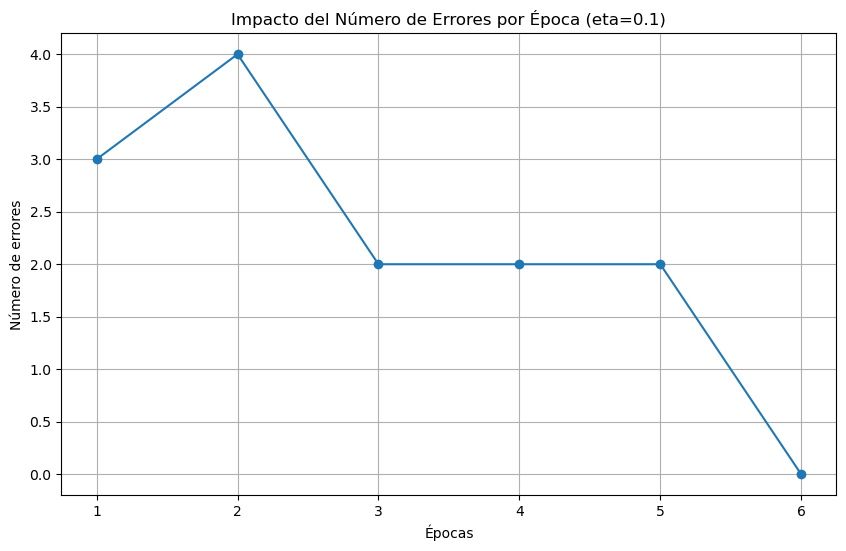

Precisión del modelo en el conjunto de entrenamiento: 1.00


In [52]:
# Entrenar el Perceptrón
ppn = Perceptron(eta=0.1, n_iter=25) # Usando tasa de aprendizaje 0.1 y 25 épocas
ppn.fit(X_normalizado, y)

# Gráfica a) Errores por época
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de errores')
plt.title('Impacto del Número de Errores por Época (eta=0.1)')
plt.grid(True)
plt.show()

# Resultado de la precisión (opcional para el análisis)
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_normalizado)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_score(y, y_pred):.2f}")

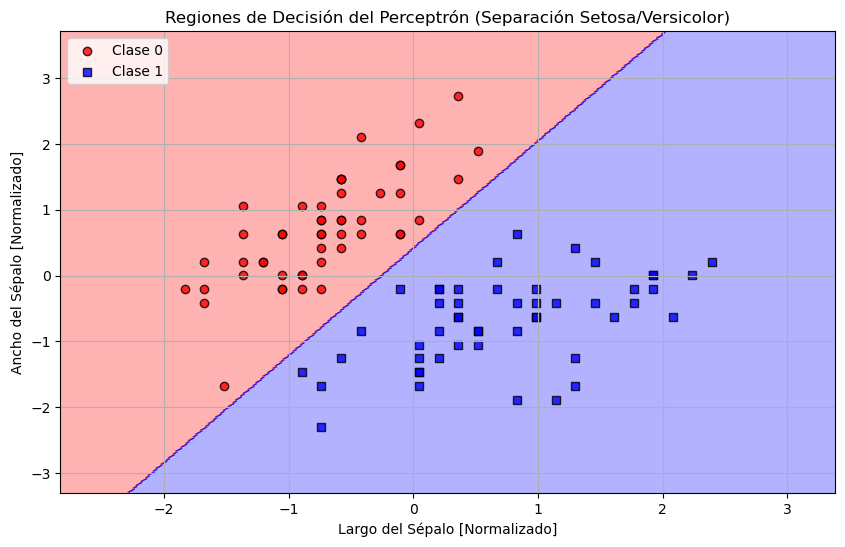

In [58]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar generador de marcadores y mapa de color
    markers = ('o', 's', 'x', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Trazar ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Clase {cl}', 
                    edgecolor='black')

# Gráfica b) Regiones de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X_normalizado, y, classifier=ppn)
plt.title('Regiones de Decisión del Perceptrón (Separación Setosa/Versicolor)')
plt.xlabel('Largo del Sépalo [Normalizado]')
plt.ylabel('Ancho del Sépalo [Normalizado]')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Tasa de aprendizaje 0.1 y epoca 50

In [ ]:
# Entrenar el Perceptrón
ppn = Perceptron(eta=0.1, n_iter=50) # Usando tasa de aprendizaje 0.1 y 50 épocas
ppn.fit(X_normalizado, y)

# Gráfica a) Errores por época
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de errores')
plt.title('Impacto del Número de Errores por Época (eta=0.1)')
plt.grid(True)
plt.show()

# Resultado de la precisión (opcional para el análisis)
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_normalizado)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_score(y, y_pred):.2f}")

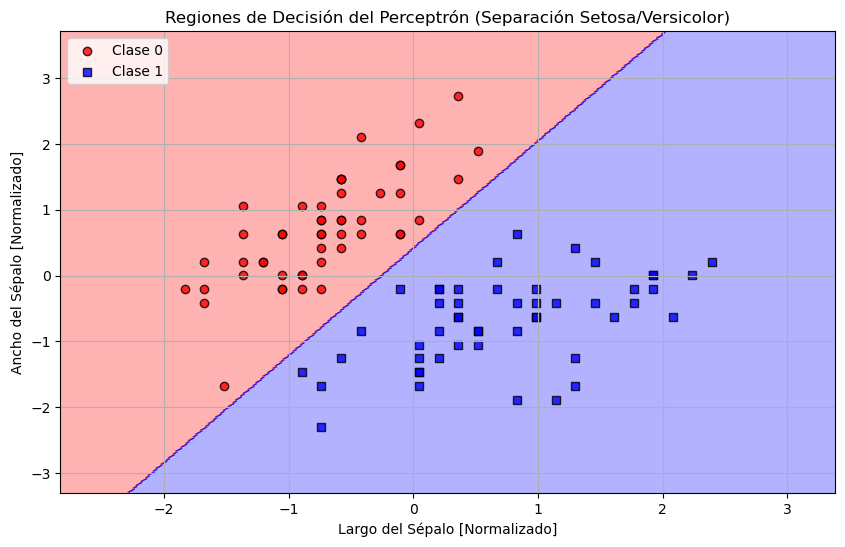

In [59]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar generador de marcadores y mapa de color
    markers = ('o', 's', 'x', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Trazar ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Clase {cl}', 
                    edgecolor='black')

# Gráfica b) Regiones de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X_normalizado, y, classifier=ppn)
plt.title('Regiones de Decisión del Perceptrón (Separación Setosa/Versicolor)')
plt.xlabel('Largo del Sépalo [Normalizado]')
plt.ylabel('Ancho del Sépalo [Normalizado]')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Tasa de aprendisaje 0.1 y epoca 100

Convergencia alcanzada en la época 6.


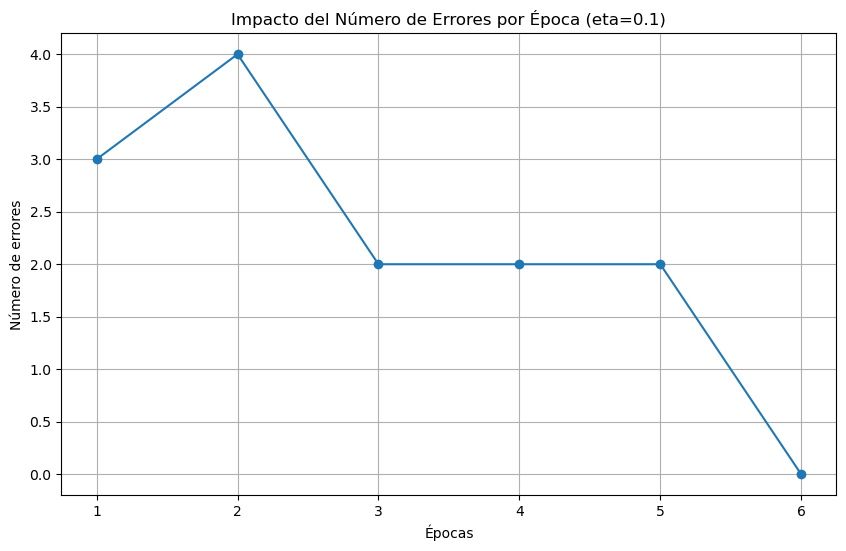

Precisión del modelo en el conjunto de entrenamiento: 1.00


In [57]:
# Entrenar el Perceptrón
ppn = Perceptron(eta=0.1, n_iter=100) # Usando tasa de aprendizaje 0.1 y 100 épocas
ppn.fit(X_normalizado, y)

# Gráfica a) Errores por época
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de errores')
plt.title('Impacto del Número de Errores por Época (eta=0.1)')
plt.grid(True)
plt.show()

# Resultado de la precisión (opcional para el análisis)
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_normalizado)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_score(y, y_pred):.2f}")

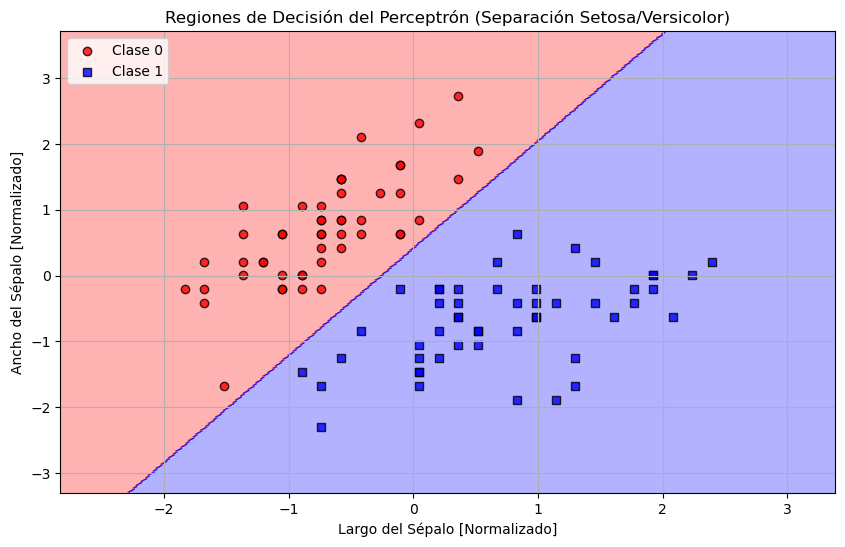

In [60]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar generador de marcadores y mapa de color
    markers = ('o', 's', 'x', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Trazar ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Clase {cl}', 
                    edgecolor='black')

# Gráfica b) Regiones de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X_normalizado, y, classifier=ppn)
plt.title('Regiones de Decisión del Perceptrón (Separación Setosa/Versicolor)')
plt.xlabel('Largo del Sépalo [Normalizado]')
plt.ylabel('Ancho del Sépalo [Normalizado]')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Analisis

## Tasa de Aprendizaje Media (η=0.1)
### Interpretación Teórica (Lo que significa):
### Se detiene en Época 6.	
- Convergencia Lenta pero Consistente. Esta tasa es 10 veces mayor que la anterior, pero curiosamente, tarda más en converger. Esto puede ser una casualidad de las iteraciones o de los pesos iniciales, pero el modelo toma más "tiempo" para asentarse en la mejor frontera.
### La frontera se mueve ligeramente.	
- Ajustes Mínimos. La tasa media hace ajustes lo suficientemente grandes como para ser eficientes, pero no tan agresivos como para causar un caos en la frontera.

# Experimentacion 3

# Para eta = 1

## Tasa de aprendizaje y 10 epocas

In [61]:
# Entrenar el Perceptrón
ppn = Perceptron(eta=1.0, n_iter=10) # Usando tasa de aprendizaje 1.0 y 10 épocas
ppn.fit(X_normalizado, y)

# Gráfica a) Errores por época
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de errores')
plt.title('Impacto del Número de Errores por Época (eta=0.1)')
plt.grid(True)
plt.show()

# Resultado de la precisión (opcional para el análisis)
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_normalizado)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_score(y, y_pred):.2f}")

Convergencia alcanzada en la época 5.


Precisión del modelo en el conjunto de entrenamiento: 1.00


In [62]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar generador de marcadores y mapa de color
    markers = ('o', 's', 'x', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Trazar ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Clase {cl}', 
                    edgecolor='black')

# Gráfica b) Regiones de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X_normalizado, y, classifier=ppn)
plt.title('Regiones de Decisión del Perceptrón (Separación Setosa/Versicolor)')
plt.xlabel('Largo del Sépalo [Normalizado]')
plt.ylabel('Ancho del Sépalo [Normalizado]')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Tasa de aprendizaje 1.0 y epoca 25

In [64]:
# Entrenar el Perceptrón
ppn = Perceptron(eta=1.0, n_iter=25) # Usando tasa de aprendizaje 1.0 y 10 épocas
ppn.fit(X_normalizado, y)

# Gráfica a) Errores por época
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de errores')
plt.title('Impacto del Número de Errores por Época (eta=0.1)')
plt.grid(True)
plt.show()

# Resultado de la precisión (opcional para el análisis)
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_normalizado)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_score(y, y_pred):.2f}")

Convergencia alcanzada en la época 5.


Precisión del modelo en el conjunto de entrenamiento: 1.00


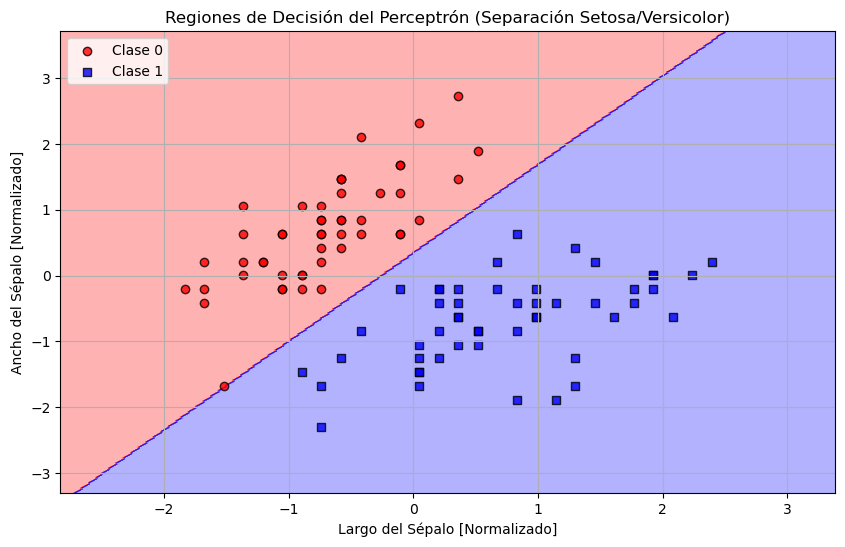

In [66]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar generador de marcadores y mapa de color
    markers = ('o', 's', 'x', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Trazar ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Clase {cl}', 
                    edgecolor='black')

# Gráfica b) Regiones de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X_normalizado, y, classifier=ppn)
plt.title('Regiones de Decisión del Perceptrón (Separación Setosa/Versicolor)')
plt.xlabel('Largo del Sépalo [Normalizado]')
plt.ylabel('Ancho del Sépalo [Normalizado]')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Tasa de aprendizaje 1.0 y epoca 50

Convergencia alcanzada en la época 5.


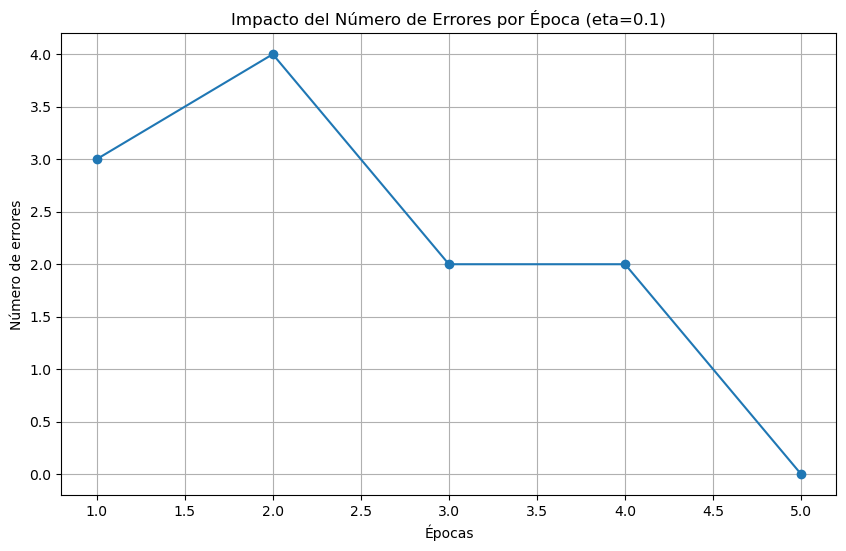

Precisión del modelo en el conjunto de entrenamiento: 1.00


In [69]:
# Entrenar el Perceptrón
ppn = Perceptron(eta=1.0, n_iter=50) # Usando tasa de aprendizaje 1.0 y 50 épocas
ppn.fit(X_normalizado, y)

# Gráfica a) Errores por época
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de errores')
plt.title('Impacto del Número de Errores por Época (eta=0.1)')
plt.grid(True)
plt.show()

# Resultado de la precisión (opcional para el análisis)
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_normalizado)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_score(y, y_pred):.2f}")

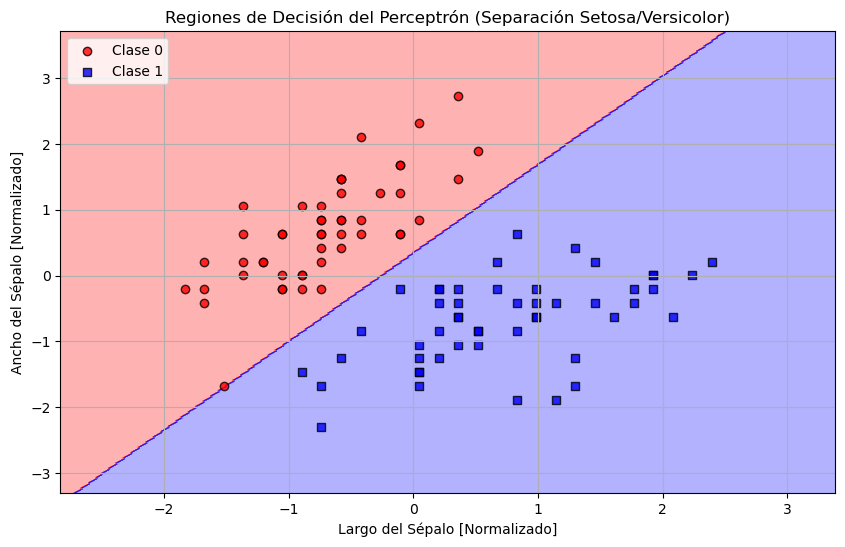

In [71]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar generador de marcadores y mapa de color
    markers = ('o', 's', 'x', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Trazar ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Clase {cl}', 
                    edgecolor='black')

# Gráfica b) Regiones de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X_normalizado, y, classifier=ppn)
plt.title('Regiones de Decisión del Perceptrón (Separación Setosa/Versicolor)')
plt.xlabel('Largo del Sépalo [Normalizado]')
plt.ylabel('Ancho del Sépalo [Normalizado]')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Tasa de aprendizaje 1.0 y epoca 100

Convergencia alcanzada en la época 5.


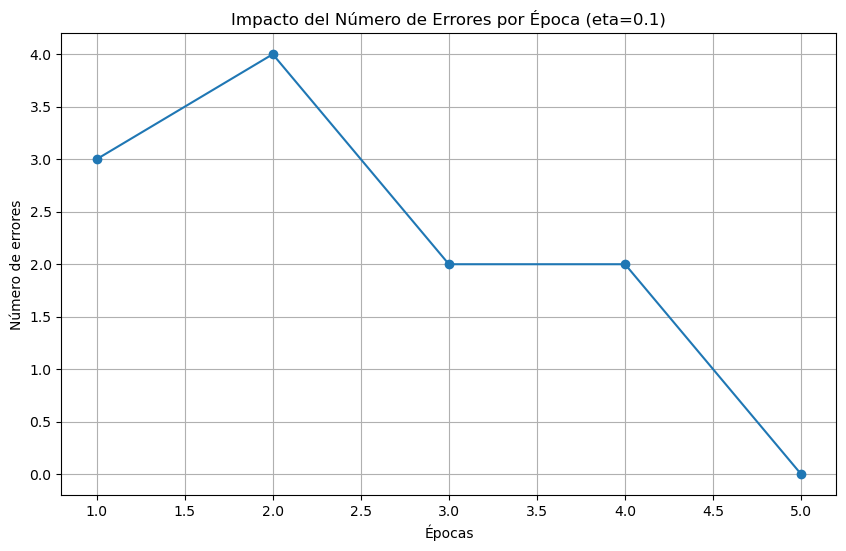

Precisión del modelo en el conjunto de entrenamiento: 1.00


In [74]:
# Entrenar el Perceptrón
ppn = Perceptron(eta=1, n_iter=100) # Usando tasa de aprendizaje 1.0 y 10 épocas
ppn.fit(X_normalizado, y)

# Gráfica a) Errores por época
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de errores')
plt.title('Impacto del Número de Errores por Época (eta=0.1)')
plt.grid(True)
plt.show()

# Resultado de la precisión (opcional para el análisis)
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_normalizado)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_score(y, y_pred):.2f}")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


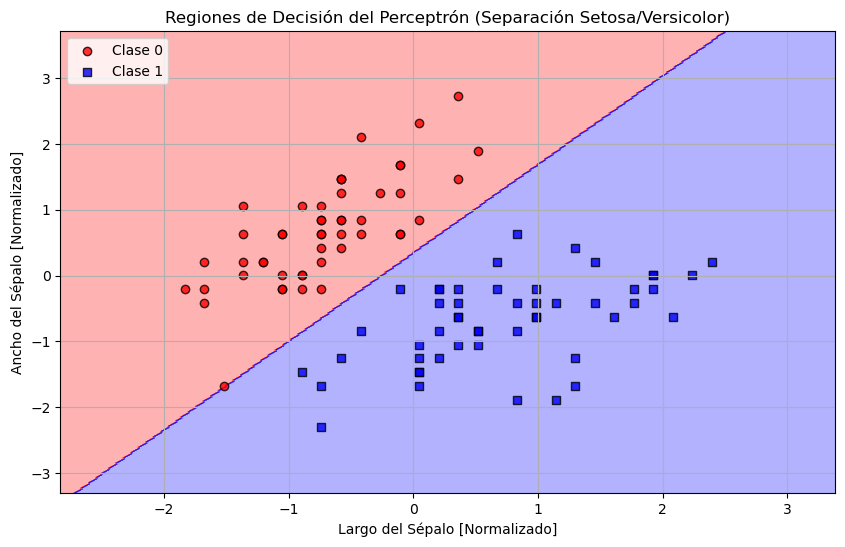

In [76]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar generador de marcadores y mapa de color
    markers = ('o', 's', 'x', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Trazar ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Clase {cl}', 
                    edgecolor='black')

# Gráfica b) Regiones de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X_normalizado, y, classifier=ppn)
plt.title('Regiones de Decisión del Perceptrón (Separación Setosa/Versicolor)')
plt.xlabel('Largo del Sépalo [Normalizado]')
plt.ylabel('Ancho del Sépalo [Normalizado]')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Analisis

## Tasa de Aprendizaje Alta (η=1.0)
### Interpretación Teórica (Lo que significa):
### Se detiene en Época 5.	
- Convergencia Agresiva y Rápida. El modelo toma pasos grandes y decisivos. Encuentra la solución más rápido (Época 5) porque cada error provoca un ajuste enorme, lo que lo impulsa a la solución más rápidamente.
### La frontera se mueve hasta partir un dato.	
- Overshooting (Pasarse de la raya). Este es el efecto negativo de una η muy alta. Aunque es rápida, los pasos son tan grandes que la frontera "salta" constantemente entre configuraciones subóptimas, y puede terminar con una frontera que es técnicamente correcta (0 errores) pero que está muy cerca de los puntos, lo cual es inestable.

## Preguntas

Análisis y justificacion de las respuestas, basándonos en la experimentación que ya realizamos con las diferentes tasas de aprendizaje ($\eta = 0.01, 0.1, 1.0$) y el comportamiento del Perceptrón.


## 1. Impacto de la Tasa de Aprendizaje ($\eta$) en la Convergencia

La tasa de aprendizaje ($\eta$) determina el **tamaño del paso** que da el Perceptrón para corregir un error.

* **Tasa Baja ($\eta = 0.01$):**
    * **Efecto:** El Perceptrón da pasos muy pequeños y cautelosos.
    * **Análisis:** Esto garantiza que el algoritmo **convierta a una solución estable** (cero errores) sin oscilar ni pasarse de la raya (overshooting). Sin embargo, esto puede requerir **más épocas** para converger si el problema fuera más complejo.

* **Tasa Alta ($\eta = 1.0$):**
    * **Efecto:** El Perceptrón da pasos grandes y agresivos para corregir los errores.
    * **Análisis:** Esto puede resultar en una **convergencia muy rápida** (como vimos en la Época 5), pero con **ajustes bruscos** en la frontera de decisión. Si el problema no fuera linealmente separable, una tasa alta podría hacer que la frontera "salte" constantemente y **nunca encuentre una solución estable**.

* **Conclusión:** La tasa de aprendizaje afecta directamente la **velocidad y la estabilidad** del algoritmo. Las tasas bajas son estables pero lentas; las tasas altas son rápidas pero pueden ser inestables.


## 2. Impacto del Número de Épocas ($n\_{iter}$)

El número de épocas es el límite máximo de veces que el Perceptrón examinará todo el conjunto de entrenamiento.

* **Muy pocas épocas (Ej. $n\_{iter} = 1$ o $5$):**
    * **Sucede que:** El modelo **no alcanza la convergencia**. Los pesos no tienen suficiente tiempo para ajustarse hasta el punto de eliminar todos los errores.
    * **Riesgo:** El modelo se queda **subentrenado** (`underfitting`), lo que resulta en una baja precisión.

* **Muchas épocas (Ej. $n\_{iter} = 50$ o $100$):**
    * **Sucede que:** No cambia nada una vez que el error llega a cero. Como el Perceptrón tiene la condición de parada de error cero (lo que se conoce como **convergencia**), al encontrar la solución en la época 4 o 6, el modelo simplemente se detiene, haciendo que el resto de las épocas sean irrelevantes.
    * **Riesgo:** En problemas más complejos (donde la convergencia es lenta), un número alto de épocas es necesario. En nuestro caso, solo añade tiempo de cómputo innecesario.


## 3. Comportamiento de la Frontera de Decisión

La frontera de decisión de tu gráfica se comporta de manera ideal.

* **Forma:** La frontera es una **línea recta**. Esto se debe a que el Perceptrón de una sola capa es un clasificador **lineal**.
* **Separación:** La frontera de decisión se ubica en el espacio entre los clusters de **Setosa** y **Versicolor**, separando perfectamente los puntos de la Clase 0 (rojo) de los de la Clase 1 (azul).
* **Significado:** La gráfica generada es la **prueba visual** de que el problema de clasificación con estas dos características es **linealmente separable**.


## 4. Modificaciones al Agregar una Clase Adicional (Iris Virginica)

Si agregaro una tercera clase (**Iris Virginica**), el Perceptrón simple de una sola capa **dejaría de funcionar** correctamente.

* **Modificación Requerida:** Necesitaría usar un **Perceptrón de Múltiples Capas (MLP)**, o lo que comúnmente se conoce como una **Red Neuronal Artificial simple**.
* **Justificación:** Un Perceptrón simple solo puede resolver problemas de **clasificación binaria** (dos clases a la vez). Para una clasificación multiclase (tres o más), necesitarías:
    1.  **Múltiples Unidades de Salida:** Una neurona de salida por cada clase (3 neuronas: Setosa, Versicolor, Virginica).
    2.  **Arquitectura "One-vs-All" (Uno contra Todos):** El modelo se entrenaría para distinguir la clase de interés del resto de las clases simultáneamente.
    3.  **Función de Activación:** Cambiar la función escalón por una función de activación más compleja, como **Softmax**, para obtener probabilidades de pertenencia a cada una de las tres clases.

Modificaciones para Clasificación Multiclase


El Perceptrón que implementamos es un **clasificador binario**; por diseño, solo sabe distinguir entre dos clases (Clase 0 vs. Clase 1).

Para agregar la tercera clase (`Iris Virginica`), el modelo debe convertirse en un clasificador **multiclase**, lo cual requiere las siguientes modificaciones:

1.  **Cambio de Arquitectura (Modelo):**
    * **Acción:** Reemplazar el Perceptrón simple por un **Perceptrón de Múltiples Capas (MLP)** o una arquitectura que use el método "Uno contra Todos" (**One-vs-All**).
    * **Justificación:** Un Perceptrón simple solo tiene una neurona de salida, la cual es insuficiente para etiquetar más de dos clases.

2.  **Múltiples Neuronas de Salida:**
    * **Acción:** El modelo debe tener **tres neuronas de salida** (una para Setosa, una para Versicolor y una para Virginica).
    * **Justificación:** Cada neurona de salida se activará cuando la instancia de entrada pertenezca a su clase correspondiente, lo que permite la clasificación multiclase.

3.  **Función de Activación:**
    * **Acción:** La función de activación final debería cambiarse de la simple función escalón a una función como **Softmax**.
    * **Justificación:** La función Softmax convierte las salidas del modelo en un conjunto de **probabilidades**, asegurando que la suma de las tres clases sea 1 (100%). La clase con la probabilidad más alta será la predicción final.


Generando Pair Plot...


Text(0.5, 1.02, 'Pair Plot del Dataset Iris')

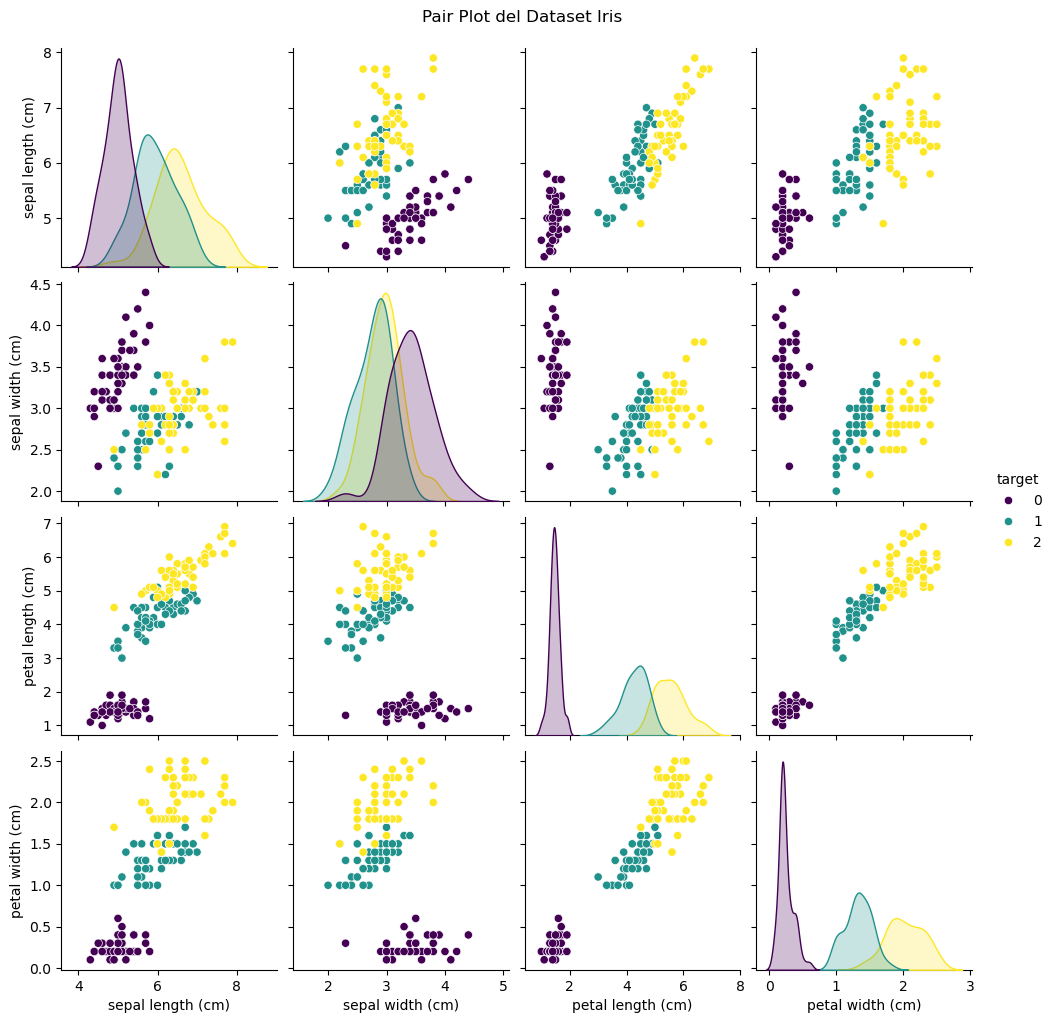

In [79]:
print("Generando Pair Plot...")
sns.pairplot(df_iris.drop('target_name', axis=1),
             hue="target",         # Colorea los puntos según la columna 'target'
             diag_kind="kde",      # Usa gráficos de densidad en la diagonal
             palette='viridis')
plt.suptitle('Pair Plot del Dataset Iris', y=1.02)